## Final Project Submission

Please fill out:
* Student name: Brian Chacha
* Student pace: full time
* Scheduled project review date/time: 15/09/2023 
* Instructor name: Nikita Njoroge

## Microsoft Studio Data Analytics

# Business Understanding
Microsoft wants to start making movies and make a big impact in this industry. This project is all about helping them get started and plan for the future. To do that, we're going to use data to answer two important questions: 
* What factors contribute to the success of Box Office Hits?
    * Is it the budget?
    * Is it the directors?
    * What is it exactly?
* What Are the Top-Performing Film Genres at the Box Office?
    * Is it a specific genre?
    * Is it a combination?


In [117]:
""" 
Import the following libraries for various purposes:
- 'sqlite3' is used for interacting and executing the data stored in SQLite databases
- `pandas` is used for data manipulation and analysis.
- 'seaborn' is used for data visualization
- `matplotlib.pyplot` is used for data visualization.
- `numpy` is imported for mathematical operations on arrays.
"""


import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Load the Data.
#### Use the different libraries to load datasets.

In [118]:
bom_movie_gross = pd.read_csv('./datasets/bom.movie_gross.csv', index_col=0)

movies = pd.read_csv('./datasets/movies.csv', index_col=0)

rt_movie_info = pd.read_csv('./datasets/rt.movie_info.tsv', delimiter='\t')

tmdb_movies = pd.read_csv('./datasets/tmdb.movies.csv')

tn_movie_budgets = pd.read_csv('./datasets/tn.movie_budgets.csv', index_col=2)


In [119]:
"""
There is an encoding issue with one file, this will be loaded differently.

Open in binary format to avoid any encoding,
Then use the chardet library to detect the encoding 
Then use the result to load it
"""

import chardet

path = './datasets/rt.reviews.tsv'

with open(path, 'rb') as file:
    result = chardet.detect(file.read())

encoding = result['encoding']

try:
    rt_reviews = pd.read_csv(path, delimiter='\t', encoding=encoding)
except UnicodeDecodeError:
    print("Unable to determine the encoding.")

In [120]:
#load the SQLite database

conn = sqlite3.connect('./datasets/im.db')
cursor = conn.cursor()


## Initial Univariate Analysis.
We will examine the measures of central tendency to introduce the datasets in the following sequence:
* IM.db
* bom_movies
* tm.movie_budgets
* rt.movie_info
* movies
* tmdb.movies
* rt.reviews

### IMDB
Get the table names contained in the database then columns contained within each. 

In [121]:
#get the table names
table_names = pd.read_sql("""SELECT * FROM sqlite_master WHERE type= 'table' ;""", conn)
table_names

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [122]:
q1 = """ 
SELECT * FROM movie_akas
;"""

movie_akas = pd.read_sql(q1, conn)
movie_akas.info

<bound method DataFrame.info of          movie_id  ordering                                    title region  \
0       tt0369610        10                            Джурасик свят     BG   
1       tt0369610        11                        Jurashikku warudo     JP   
2       tt0369610        12  Jurassic World: O Mundo dos Dinossauros     BR   
3       tt0369610        13                  O Mundo dos Dinossauros     BR   
4       tt0369610        14                           Jurassic World     FR   
...           ...       ...                                      ...    ...   
331698  tt9827784         2                       Sayonara kuchibiru   None   
331699  tt9827784         3                            Farewell Song    XWW   
331700  tt9880178         1                              La atención   None   
331701  tt9880178         2                              La atención     ES   
331702  tt9880178         3                            The Attention    XWW   

       language    

In [123]:
q2 = """ 
SELECT * FROM movie_basics
;"""

movie_basics = pd.read_sql(q2, conn)
movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [124]:
q3 = """ 
SELECT * FROM directors
;"""

directors = pd.read_sql(q3, conn)
directors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291174 entries, 0 to 291173
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   movie_id   291174 non-null  object
 1   person_id  291174 non-null  object
dtypes: object(2)
memory usage: 4.4+ MB


In [125]:
q4 = """ 
SELECT * FROM known_for
;"""

knownfor = pd.read_sql(q4, conn)
knownfor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1638260 entries, 0 to 1638259
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   person_id  1638260 non-null  object
 1   movie_id   1638260 non-null  object
dtypes: object(2)
memory usage: 25.0+ MB


In [126]:
q5 = """ 
SELECT * FROM movie_ratings
;"""

movie_rating = pd.read_sql(q5, conn)
movie_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [127]:
q6 = """ 
SELECT * FROM persons
;"""

persons = pd.read_sql(q6, conn)
persons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   person_id           606648 non-null  object 
 1   primary_name        606648 non-null  object 
 2   birth_year          82736 non-null   float64
 3   death_year          6783 non-null    float64
 4   primary_profession  555308 non-null  object 
dtypes: float64(2), object(3)
memory usage: 23.1+ MB


In [128]:
q7 = """ 
SELECT * FROM principals
;"""

principals = pd.read_sql(q7, conn)
principals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028186 entries, 0 to 1028185
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   movie_id    1028186 non-null  object
 1   ordering    1028186 non-null  int64 
 2   person_id   1028186 non-null  object
 3   category    1028186 non-null  object
 4   job         177684 non-null   object
 5   characters  393360 non-null   object
dtypes: int64(1), object(5)
memory usage: 47.1+ MB


In [129]:
q8 = """ 
SELECT * FROM writers
;"""

writers = pd.read_sql(q8, conn)
writers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255873 entries, 0 to 255872
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   movie_id   255873 non-null  object
 1   person_id  255873 non-null  object
dtypes: object(2)
memory usage: 3.9+ MB


### Necessary Columns
Identify and Join only the essential columns into one table and make it a dataframe.

In [130]:
movie_query = """
SELECT
    mb.movie_id,
    mb.primary_title,
    mb.start_year,
    mb.runtime_minutes,
    mb.genres
FROM movie_basics AS mb
"""
movie_df = pd.read_sql_query(movie_query, conn)

In [131]:
director_query = """
SELECT
    d.movie_id,
    p.primary_name AS director_name
FROM (
    SELECT DISTINCT movie_id, person_id FROM directors
    UNION
    SELECT DISTINCT movie_id, person_id FROM known_for
) AS d
LEFT JOIN persons AS p ON p.person_id = d.person_id
"""
director_df = pd.read_sql_query(director_query, conn)


In [132]:
rating_query = """
SELECT
    mr.movie_id,
    mr.averagerating,
    mr.numvotes
FROM movie_ratings AS mr
"""
rating_df = pd.read_sql_query(rating_query, conn)

In [133]:
combined_df = pd.merge(movie_df, director_df, on='movie_id', how='left')
imdb = pd.merge(combined_df, rating_df, on='movie_id', how='left')

In [134]:
#to avoid multiple running of the above queries i save the file to a new csv files
conn.close()

csv_file_path = './datasets/imdb.csv'

imdb.to_csv(csv_file_path, index=False)


In [135]:
#load the new dataset
imdb_csv = pd.read_csv('./datasets/imdb.csv', )

imdb_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840868 entries, 0 to 840867
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         840868 non-null  object 
 1   primary_title    840868 non-null  object 
 2   start_year       840868 non-null  int64  
 3   runtime_minutes  702488 non-null  float64
 4   genres           824889 non-null  object 
 5   director_name    837366 non-null  object 
 6   averagerating    550591 non-null  float64
 7   numvotes         550591 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 51.3+ MB


In [136]:
imdb_csv['start_year'] = pd.to_datetime(imdb_csv['start_year'])
imdb_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840868 entries, 0 to 840867
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   movie_id         840868 non-null  object        
 1   primary_title    840868 non-null  object        
 2   start_year       840868 non-null  datetime64[ns]
 3   runtime_minutes  702488 non-null  float64       
 4   genres           824889 non-null  object        
 5   director_name    837366 non-null  object        
 6   averagerating    550591 non-null  float64       
 7   numvotes         550591 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 51.3+ MB


In [137]:
imdb_csv.isna().sum()

movie_id                0
primary_title           0
start_year              0
runtime_minutes    138380
genres              15979
director_name        3502
averagerating      290277
numvotes           290277
dtype: int64

We're done with the im.db now onto the remaining csv files

##  Univariate Analysis
Now lets jump onto the rest of the datasets we have and get an understanding of what we're working with.

In [138]:
# Univariate analysis for domestic_gross
domestic_gross_summary = bom_movie_gross['domestic_gross'].describe()
print("Summary statistics for domestic_gross:")
print(domestic_gross_summary)

# Univariate analysis for foreign_gross
foreign_gross_summary = bom_movie_gross['foreign_gross'].describe()
print("\nSummary statistics for foreign_gross:")
print(foreign_gross_summary)

Summary statistics for domestic_gross:
count    3.359000e+03
mean     2.874585e+07
std      6.698250e+07
min      1.000000e+02
25%      1.200000e+05
50%      1.400000e+06
75%      2.790000e+07
max      9.367000e+08
Name: domestic_gross, dtype: float64

Summary statistics for foreign_gross:
count        2037
unique       1204
top       1200000
freq           23
Name: foreign_gross, dtype: object


In [139]:
# Univariate analysis for rating
rating_summary = rt_movie_info['rating'].describe()
print("Summary statistics for rating:")
print(rating_summary)

# Univariate analysis for runtime
runtime_summary = rt_movie_info['runtime'].describe()
print("\nSummary statistics for runtime:")
print(runtime_summary)

# Univariate analysis for genre (requires some preprocessing if genres are stored as strings)
genre_counts = rt_movie_info['genre'].value_counts()
print("\nGenre counts:")
print(genre_counts)

Summary statistics for rating:
count     1557
unique       6
top          R
freq       521
Name: rating, dtype: object

Summary statistics for runtime:
count           1530
unique           142
top       90 minutes
freq              72
Name: runtime, dtype: object

Genre counts:
Drama                                                                                                 151
Comedy                                                                                                110
Comedy|Drama                                                                                           80
Drama|Mystery and Suspense                                                                             67
Art House and International|Drama                                                                      62
                                                                                                     ... 
Comedy|Documentary|Musical and Performing Arts|Special Interest                     

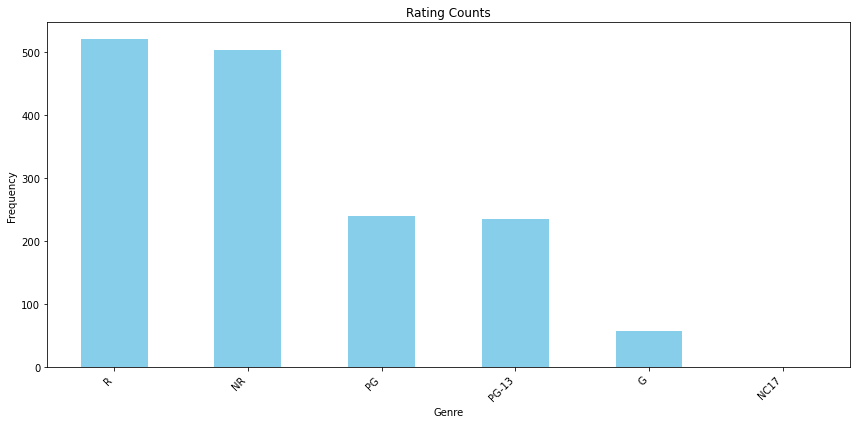

In [140]:
genre_counts = rt_movie_info['rating'].value_counts()

# Create a bar graph
plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Rating Counts')
plt.ylabel('Frequency')
plt.xlabel('Genre')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

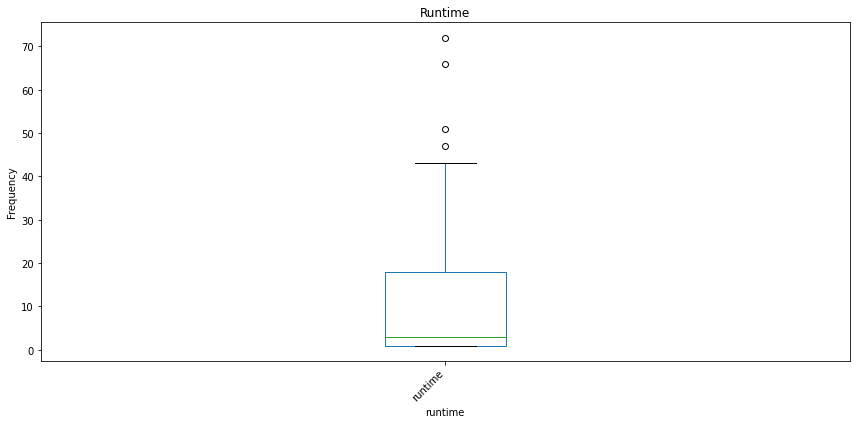

In [173]:
genre_counts = rt_movie_info['runtime'].value_counts()

# Create a bar graph
plt.figure(figsize=(12, 6))
genre_counts.plot(kind='box')
plt.title('Runtime')
plt.ylabel('Frequency')
plt.xlabel('runtime')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [142]:
# Univariate analysis for production budget
production_budget_summary = tn_movie_budgets['production_budget'].describe()
print("Summary statistics for production budget:")
print(production_budget_summary)

# Univariate analysis for domestic_gross
domestic_gross_summary = tn_movie_budgets['domestic_gross'].describe()
print("\nSummary statistics for domestic_gross:")
print(domestic_gross_summary)

# Univariate analysis for worldwide_gross
worldwide_gross_summary = tn_movie_budgets['worldwide_gross'].describe()
print("\nSummary statistics for worldwide_gross:")
print(worldwide_gross_summary)

Summary statistics for production budget:
count            5782
unique            509
top       $20,000,000
freq              231
Name: production_budget, dtype: object

Summary statistics for domestic_gross:
count     5782
unique    5164
top         $0
freq       548
Name: domestic_gross, dtype: object

Summary statistics for worldwide_gross:
count     5782
unique    5356
top         $0
freq       367
Name: worldwide_gross, dtype: object


In [143]:
# Univariate analysis for popularity
popularity_summary = tmdb_movies['popularity'].describe()
print("Summary statistics for popularity:")
print(popularity_summary)

# Univariate analysis for vote_average
vote_average_summary = tmdb_movies['vote_average'].describe()
print("\nSummary statistics for vote_average:")
print(vote_average_summary)

# Univariate analysis for vote_count
vote_count_summary = tmdb_movies['vote_count'].describe()
print("\nSummary statistics for vote_count:")
print(vote_count_summary)

Summary statistics for popularity:
count    26517.000000
mean         3.130912
std          4.355229
min          0.600000
25%          0.600000
50%          1.374000
75%          3.694000
max         80.773000
Name: popularity, dtype: float64

Summary statistics for vote_average:
count    26517.000000
mean         5.991281
std          1.852946
min          0.000000
25%          5.000000
50%          6.000000
75%          7.000000
max         10.000000
Name: vote_average, dtype: float64

Summary statistics for vote_count:
count    26517.000000
mean       194.224837
std        960.961095
min          1.000000
25%          2.000000
50%          5.000000
75%         28.000000
max      22186.000000
Name: vote_count, dtype: float64


### Preliminary data cleaning and bivariate analysis

Joining different categories:
* Budgeting and Gross
* Genres and Ratings

In [144]:
#sort alphabetically using the movie names
bom_movie_gross = bom_movie_gross.sort_values(by = 'title')
tn_movie_budgets = tn_movie_budgets.sort_values(by= 'movie')
movies= movies.sort_values(by= 'name')

In [145]:
#convert the columns to correct Dtypes
tn_movie_budgets['release_date'] = pd.to_datetime(tn_movie_budgets['release_date'])
tn_movie_budgets['production_budget'] = tn_movie_budgets['production_budget'].str.replace('[^\d.]', '', regex=True).astype(float)
tn_movie_budgets['domestic_gross'] = tn_movie_budgets['domestic_gross'].str.replace('[^\d.]', '', regex=True).astype(float)
tn_movie_budgets['worldwide_gross'] = tn_movie_budgets['worldwide_gross'].str.replace('[^\d.]', '', regex=True).astype(float)

#create a new column to calculate the foreign gross
tn_movie_budgets['foreign_gross'] = tn_movie_budgets['worldwide_gross']-tn_movie_budgets['domestic_gross']


### Null Entries
Both tn_movie_budget and bom_movie_gross have similar columns.
However, some rows in different columns are null with some having a place-holder of 0, therefore, the remedy is combining the two sets which  allows fixing of some entries. 
We can then drop the remaining null entries.

In [146]:
#outer join to retain entries from both datasets
#create a column for sum of both gross entries

merged_df = tn_movie_budgets.merge(bom_movie_gross, left_index=True, right_index=True, suffixes=('_df1', '_df2'), how='outer')
merged_df['foreign_gross_df2'] = merged_df['foreign_gross_df2'].str.replace('[^\d.]', '', regex=True).astype(float)
merged_df['max_foreign_gross'] = merged_df[['foreign_gross_df1', 'foreign_gross_df2']].max(axis=1)
merged_df['max_domestic_gross'] = merged_df[['domestic_gross_df1', 'domestic_gross_df2']].max(axis=1)
merged_df['max_worldwide_gross'] = merged_df['max_foreign_gross'] + merged_df['max_domestic_gross']



merged_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 7931 entries, #Horror to é·æ±ä¸è (CJ7)
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   5782 non-null   float64       
 1   release_date         5782 non-null   datetime64[ns]
 2   production_budget    5782 non-null   float64       
 3   domestic_gross_df1   5782 non-null   float64       
 4   worldwide_gross      5782 non-null   float64       
 5   foreign_gross_df1    5782 non-null   float64       
 6   studio               3391 non-null   object        
 7   domestic_gross_df2   3368 non-null   float64       
 8   foreign_gross_df2    2044 non-null   float64       
 9   year                 3396 non-null   float64       
 10  max_foreign_gross    6740 non-null   float64       
 11  max_domestic_gross   7905 non-null   float64       
 12  max_worldwide_gross  6714 non-null   float64       
dtypes: datetime64[ns](

In [147]:
#filter out the production budget and max_worldwide_gross
columns_to_keep = [ 2, 12]
df = merged_df.iloc[:, columns_to_keep]
df.isna().sum()

production_budget      2149
max_worldwide_gross    1217
dtype: int64

In [148]:
result_df = pd.merge(
    df[['production_budget', 'max_worldwide_gross']],
    movies[['budget', 'gross']],
    left_index=True,
    right_index=True,
    how='outer'
)


result_df['budget'] = result_df[['budget', 'production_budget']].max(axis=1)
result_df['gross'] = result_df[['gross', 'max_worldwide_gross']].max(axis=1)

#drop the unneeded columns
result_df.drop(['production_budget', 'max_worldwide_gross'], axis=1, inplace=True)


result_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11718 entries, #Horror to é·æ±ä¸è (CJ7)
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   budget  7984 non-null   float64
 1   gross   10495 non-null  float64
dtypes: float64(2)
memory usage: 274.6+ KB


In [149]:
#deal with null entries
budget_N_gross = result_df.dropna()
budget_N_gross.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7929 entries, #Horror to é·æ±ä¸è (CJ7)
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   budget  7929 non-null   float64
 1   gross   7929 non-null   float64
dtypes: float64(2)
memory usage: 185.8+ KB


### Bivariate Analysis.
This analysis allows us to now compare two columns and see the relationship they have.

In [150]:
#round the value.

print(f"The average budget for a movie is ${(budget_N_gross['budget'].mean()).round()}")
print(f"The average gross for a movie is ${(budget_N_gross['gross'].mean()).round()}")


The average budget for a movie is $31157856.0
The average gross for a movie is $88134482.0


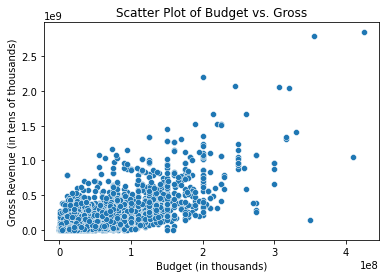

In [151]:
#scatter diagram showing the relationship between budget and gross of a movie

ax = sns.scatterplot(data=budget_N_gross, x='budget', y='gross')

ax.set_xlabel('Budget (in thousands)')
ax.set_ylabel('Gross Revenue (in tens of thousands)')

plt.title('Scatter Plot of Budget vs. Gross')

plt.show()

The Scatter plot shows that the higher the budget the higher the likely hood of gross revenue.
However, we not that this is not always the case.

In [152]:
imdb_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840868 entries, 0 to 840867
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   movie_id         840868 non-null  object        
 1   primary_title    840868 non-null  object        
 2   start_year       840868 non-null  datetime64[ns]
 3   runtime_minutes  702488 non-null  float64       
 4   genres           824889 non-null  object        
 5   director_name    837366 non-null  object        
 6   averagerating    550591 non-null  float64       
 7   numvotes         550591 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 51.3+ MB


In [153]:
imdb_csv = imdb_csv.dropna()

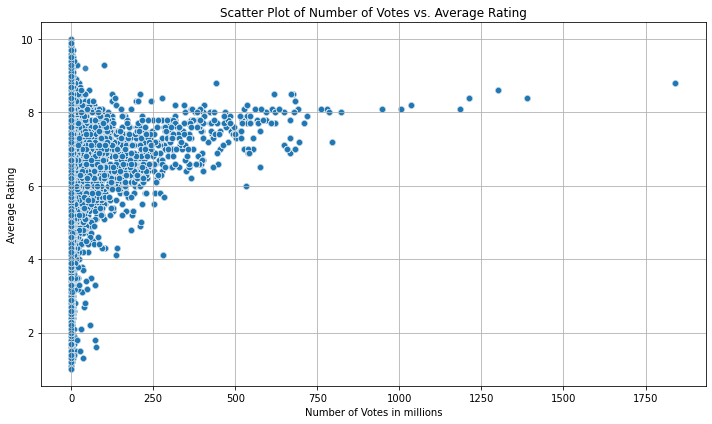

In [154]:
# Create a scatter plot for 'numvotes' and 'averagerating'

plt.figure(figsize=(10, 6))
imdb_csv['numvotes'] = imdb_csv['numvotes'] / 1000
sns.scatterplot(data=imdb_csv, x='numvotes', y='averagerating', alpha=0.5)
plt.title('Scatter Plot of Number of Votes vs. Average Rating')
plt.xlabel('Number of Votes in millions')
plt.ylabel('Average Rating')
plt.grid(True)
plt.tight_layout()
plt.show()

The scatter portrays a slightly dependent relationship between, the number of votes and the average_rating, meaning that the rating of a movie increases with the increase of votes upto a point and then stop.

In [155]:
imdb_csv.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 503357 entries, 0 to 840838
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   movie_id         503357 non-null  object        
 1   primary_title    503357 non-null  object        
 2   start_year       503357 non-null  datetime64[ns]
 3   runtime_minutes  503357 non-null  float64       
 4   genres           503357 non-null  object        
 5   director_name    503357 non-null  object        
 6   averagerating    503357 non-null  float64       
 7   numvotes         503357 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 34.6+ MB


In [156]:
imdb_csv['genres'].head()

0    Action,Crime,Drama
1    Action,Crime,Drama
2    Action,Crime,Drama
3       Biography,Drama
4                 Drama
Name: genres, dtype: object

In [157]:
#extract the different genres, since some are grouped together
genres_split = imdb_csv['genres'].str.split(',', expand=True)

# Stack the columns to create a single column with genre values
stacked_genres = genres_split.stack()

# Reset the index to make the genre values a regular column
stacked_genres = stacked_genres.reset_index(drop=True)

# Rename the column to 'genre'
stacked_genres = stacked_genres.rename({0: 'genre'}, axis=1)


genre_counts = stacked_genres.explode('genre').value_counts()




In [158]:
# Create a new DataFrame to store each genre separately
# genre_df = imdb_csv.explode('genres')
# genre_df.info()

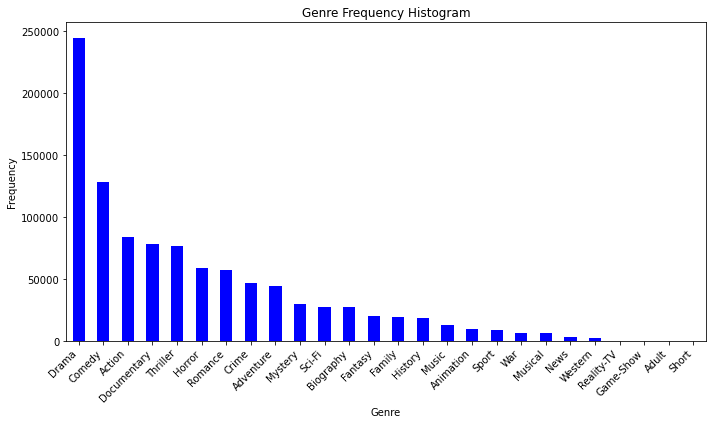

In [159]:
#histogram to show the frequency of different genres

plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='blue')
plt.title('Genre Frequency Histogram')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Data Cleaning.
### Identify any discrepancies in the data.
So far we have two working combined dataframes.
Join the two combined dataframes into one, drop any null values and then get your new cleaned data.
* imdb_csv
* budget_N_gross
The combined dataframe will help us in a conducting a more indepth bivariate and multivariate analysis.


In [160]:
imdb_csv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 503357 entries, 0 to 840838
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   movie_id         503357 non-null  object        
 1   primary_title    503357 non-null  object        
 2   start_year       503357 non-null  datetime64[ns]
 3   runtime_minutes  503357 non-null  float64       
 4   genres           503357 non-null  object        
 5   director_name    503357 non-null  object        
 6   averagerating    503357 non-null  float64       
 7   numvotes         503357 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 54.6+ MB


In [161]:
budget_N_gross.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7929 entries, #Horror to é·æ±ä¸è (CJ7)
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   budget  7929 non-null   float64
 1   gross   7929 non-null   float64
dtypes: float64(2)
memory usage: 185.8+ KB


In [162]:
#drop the unneeded column and make the movie names the index


# Set 'primary_title' as the index
imdb_csv.set_index('primary_title', inplace=True)
imdb_csv.head()

,movie_id,start_year,runtime_minutes,genres,director_name,averagerating,numvotes
primary_title,,,,,,,
Sunghursh,tt0063540,1970-01-01 00:00:00.000002013,175.0,"Action,Crime,Drama",Harnam Singh Rawail,7.0,0.077
Sunghursh,tt0063540,1970-01-01 00:00:00.000002013,175.0,"Action,Crime,Drama",Mahasweta Devi,7.0,0.077
Sunghursh,tt0063540,1970-01-01 00:00:00.000002013,175.0,"Action,Crime,Drama",Anjana Rawail,7.0,0.077
One Day Before the Rainy Season,tt0066787,1970-01-01 00:00:00.000002019,114.0,"Biography,Drama",Mani Kaul,7.2,0.043
The Other Side of the Wind,tt0069049,1970-01-01 00:00:00.000002018,122.0,Drama,Orson Welles,6.9,4.517


In [163]:
#now merge the two dataframes
# Perform an outer join on their indices
final_df = imdb_csv.merge(budget_N_gross, left_index=True, right_index=True, how='outer')
final_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 515889 entries, !Women Art Revolution to Šiška Deluxe
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   movie_id         510718 non-null  object        
 1   start_year       510718 non-null  datetime64[ns]
 2   runtime_minutes  510718 non-null  float64       
 3   genres           510718 non-null  object        
 4   director_name    510718 non-null  object        
 5   averagerating    510718 non-null  float64       
 6   numvotes         510718 non-null  float64       
 7   budget           76121 non-null   float64       
 8   gross            76121 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(3)
memory usage: 39.4+ MB


In [164]:
final_df = final_df.dropna()

## Multivariate Analysis
In this section we'll look at the relationship of various columns in reference to one column.

Average Rating vs. Box Office Earnings: Explore the relationship between a movie's average rating and its box office earnings. This can be visualized using a scatter plot.

Budget vs. Earnings: Analyze how a movie's production budget correlates with its box office earnings. Again, scatter plots can be effective for this comparison.

Director's Influence: Investigate whether certain directors have a significant impact on box office success. You can create a heatmap showing the top directors and their movie earnings.

Genre vs. Director: Explore whether specific directors tend to work within particular genres. You can use a stacked bar chart to visualize this.

Runtime vs. Earnings: Analyze how a movie's runtime relates to its box office earnings. A scatter plot can help show this relationship.

Marketing Strategies: Investigate if there's a correlation between marketing budget or strategies and box office earnings. A scatter plot with marketing budget on one axis and earnings on the other can be informative.


In [165]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70950 entries, #Horror to xXx: Return of Xander Cage
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   movie_id         70950 non-null  object        
 1   start_year       70950 non-null  datetime64[ns]
 2   runtime_minutes  70950 non-null  float64       
 3   genres           70950 non-null  object        
 4   director_name    70950 non-null  object        
 5   averagerating    70950 non-null  float64       
 6   numvotes         70950 non-null  float64       
 7   budget           70950 non-null  float64       
 8   gross            70950 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(3)
memory usage: 5.4+ MB


In [166]:
def extract_genre(genre_str):
    # Split the string by comma and get the first word as the genre
    return genre_str.split(',')[0]

# Apply the extract_genre function to create a new 'genre' column with the extracted genre
final_df['genre'] = final_df['genres'].apply(extract_genre)

# Now you can use the 'genre' column for your analysis


In [167]:
final_df['genre'].head()

#Horror    Crime
#Horror    Crime
#Horror    Crime
#Horror    Crime
#Horror    Crime
Name: genre, dtype: object

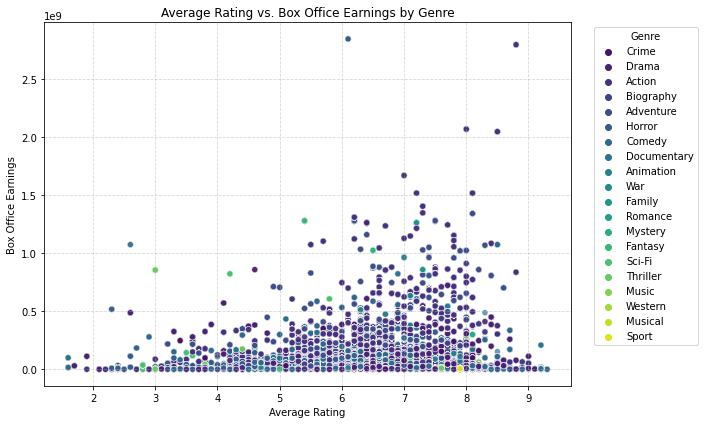

In [168]:

# Scatter plot for Average Rating vs. Box Office Earnings
plt.figure(figsize=(10, 6))
sns.scatterplot(data=final_df, x='averagerating', y='gross', hue='genre', palette='viridis', alpha=0.7)
plt.title('Average Rating vs. Box Office Earnings by Genre')
plt.xlabel('Average Rating')
plt.ylabel('Box Office Earnings')
plt.legend(title='Genre', loc='upper right', bbox_to_anchor=(1.25, 1))
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


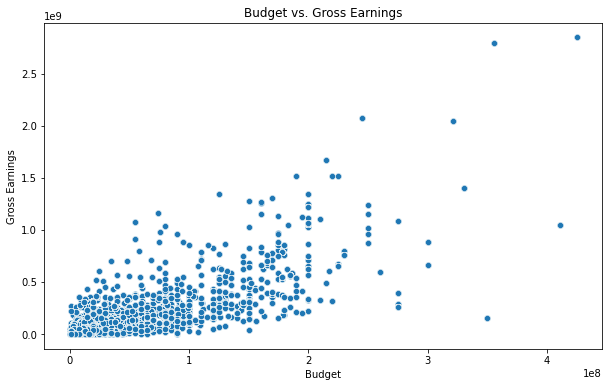

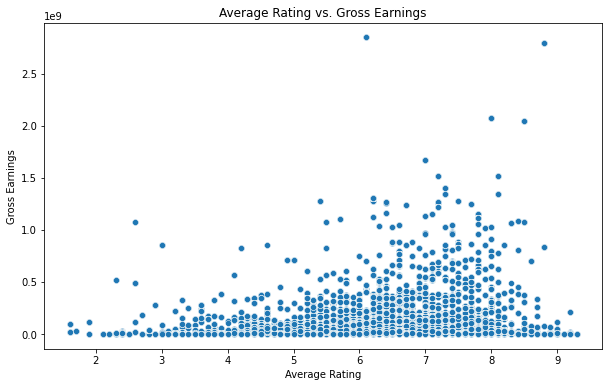

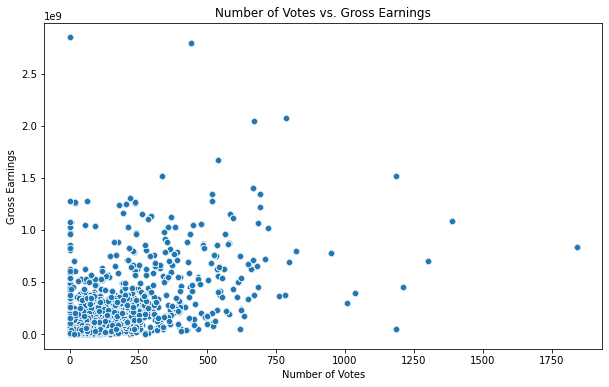

In [169]:
#  Scatterplot of budget vs. gross earnings
plt.figure(figsize=(10, 6))
sns.scatterplot(data=final_df, x='budget', y='gross')
plt.title('Budget vs. Gross Earnings')
plt.xlabel('Budget')
plt.ylabel('Gross Earnings')
plt.show()

# Scatterplot of average rating vs. gross earnings
plt.figure(figsize=(10, 6))
sns.scatterplot(data=final_df, x='averagerating', y='gross')
plt.title('Average Rating vs. Gross Earnings')
plt.xlabel('Average Rating')
plt.ylabel('Gross Earnings')
plt.show()

# Scatterplot of number of votes vs. gross earnings
plt.figure(figsize=(10, 6))
sns.scatterplot(data=final_df, x='numvotes', y='gross')
plt.title('Number of Votes vs. Gross Earnings')
plt.xlabel('Number of Votes')
plt.ylabel('Gross Earnings')
plt.show()



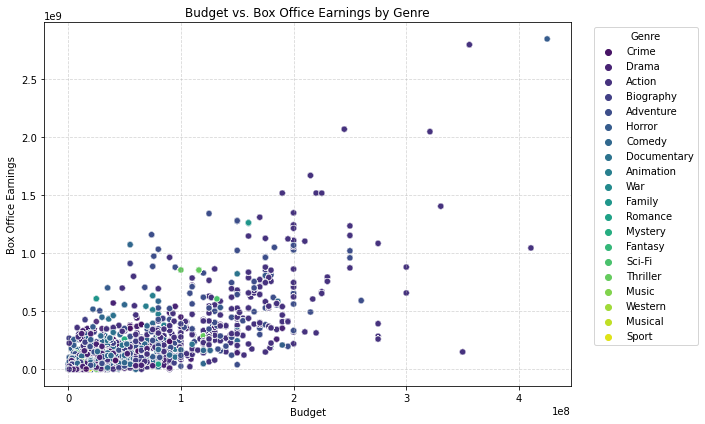

In [170]:
# Scatter plot for Budget vs. Box Office Earnings
plt.figure(figsize=(10, 6))
sns.scatterplot(data=final_df, x='budget', y='gross', hue='genre', palette='viridis', alpha=0.7)
plt.title('Budget vs. Box Office Earnings by Genre')
plt.xlabel('Budget')
plt.ylabel('Box Office Earnings')
plt.legend(title='Genre', loc='upper right', bbox_to_anchor=(1.25, 1))
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [175]:
# Create a stacked bar chart to explore genre distribution among directors
# genre_director_counts = final_df.groupby(['director_name', 'genres'])['movie_id'].count().reset_index()

# plt.figure(figsize=(12, 6))
# sns.barplot(data=genre_director_counts, x='director_name', y='movie_id', hue='genres', palette='viridis')
# plt.title('Genre Distribution Among Directors')
# plt.xlabel('Director')
# plt.ylabel('Number of Movies')
# plt.xticks(rotation=45, ha='right')
# plt.legend(title='Genre', loc='upper right', bbox_to_anchor=(1.15, 1))
# plt.tight_layout()
# plt.show()


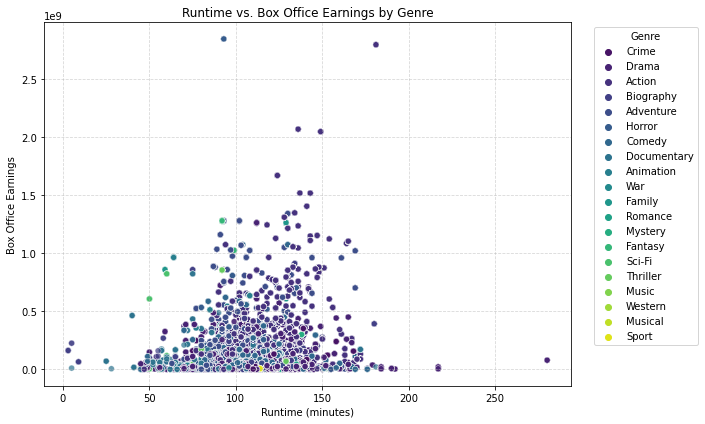

In [176]:
# Scatter plot for Runtime vs. Box Office Earnings
plt.figure(figsize=(10, 6))
sns.scatterplot(data=final_df, x='runtime_minutes', y='gross', hue='genre', palette='viridis', alpha=0.7)
plt.title('Runtime vs. Box Office Earnings by Genre')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Box Office Earnings')
plt.legend(title='Genre', loc='upper right', bbox_to_anchor=(1.25, 1))
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


## Conclusion 
Based on the results above, Microsoft should focus on Crime, Drama and Action related films moreover, they should carefully select the directors of the movies to increase their chances of producing quality movies that we'll be welcomed by audience.
Lastly, they should always be keen on the budget they set aside for their movie productions, since it has been seen affect the performance of the gross revenue.

## Recommendations
* Leverage Data-Driven Insights: Utilize data analytics to inform content creation, marketing strategies, and investment decisions for improved box office performance.

* Explore Diverse Genres: Diversify film genres to appeal to a broader audience, including documentaries, animation, and international content.

* Collaborate with Industry Experts: Seek partnerships and collaborations with experienced directors, producers, and studios to benefit from their industry knowledge and networks.

* Adapt to Audience Preferences: Continuously analyze consumer feedback and preferences to tailor content and marketing campaigns effectively.

* Integrate Advanced Analytics: Implement advanced analytics techniques, including predictive modeling and machine learning, to forecast box office success and optimize marketing efforts.

* Consider Global Expansion: Evaluate opportunities for international market expansion, taking into account regional preferences and cultural nuances.

* Prioritize Sustainability: Embrace sustainability practices in film production and distribution to align with growing environmental awareness.

* Stay Compliant: Stay updated on industry regulations and compliance standards to ensure smooth operations and ethical practices.

These recommendations are crucial for Microsoft's successful entry and long-term growth in the dynamic film industry.